<div style="width: 100%; background-color: #222; text-align: center">
<br><br>


    
<h2 style="color: #ef7d22; font-weight: normal;">
    Balancing diabetes observations
</h2>

<br><br> 
</div>





Now we will continue using the [Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes), which have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0:No or 1:Yes) 




We'll analyze if the data is balanced before training our model and how are the errors that the model make.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



### Load the `diabetes_2.csv` file, and store it into `diabetes_df` DataFrame.

This file has already wrong observations removed.

In [2]:
diabetes_df = pd.read_csv('diabetes_2.csv')
diabetes_df.head()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Show the shape of the resulting `diabetes_df`.

In [3]:
diabetes_df.shape

(724, 9)



### Analyze `label` distribution

Are observations well balanced?

How many observations we there are for 0 _(no diabetes)_ and 1 _(yes diabetes)_?

In [4]:
diabetes_df['label'].value_counts()

label
0    475
1    249
Name: count, dtype: int64

Show a barplot displaying these values:

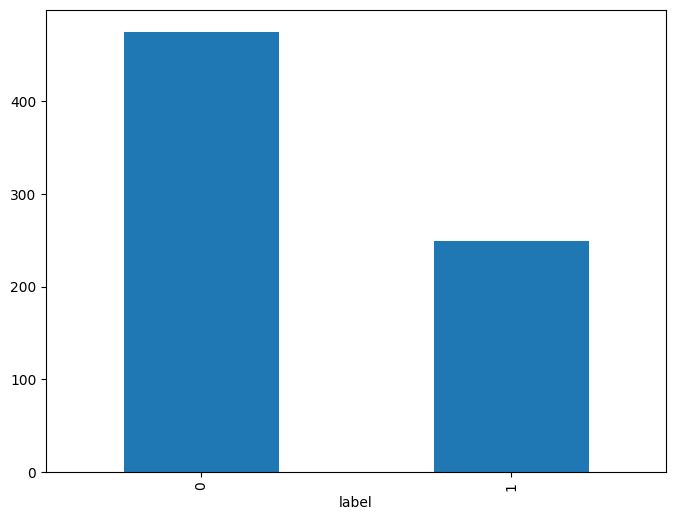

In [5]:
diabetes_df['label'].value_counts().plot(kind='bar', figsize=(8,6));

The dataset is imbalanced, with 475 non-diabetic cases (label 0) and 249 diabetic cases (label 1). This class imbalance could affect the performance of  machine learning model. Typically, a model might predict the majority class more accurately, but it may fail to detect the minority class, which in this case is the diabetic population.



### Balancing data

As observations are imbalanced, you will need to balance them.

Your task: down-sample the majority class by randomly removing `0` (no diabetes) observations.

#### Step 1

Separate observations from each class:

In [6]:
no_diabetes = diabetes_df[diabetes_df['label'] == 0]
yes_diabetes = diabetes_df[diabetes_df['label'] == 1]

no_diabetes.shape, yes_diabetes.shape

((475, 9), (249, 9))

In [7]:
no_diabetes

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
8,4,110,92,0,0,37.6,0.191,30,0
10,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
718,9,89,62,0,0,22.5,0.142,33,0
719,10,101,76,48,180,32.9,0.171,63,0
720,2,122,70,27,0,36.8,0.340,27,0
721,5,121,72,23,112,26.2,0.245,30,0


In [8]:
yes_diabetes

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
7,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
711,1,128,88,39,110,36.5,1.057,37,1
713,0,123,72,0,0,36.3,0.258,52,1
715,6,190,92,0,0,35.5,0.278,66,1
717,9,170,74,31,0,44.0,0.403,43,1


In [9]:
orginal = diabetes_df.copy()

#### Step 2

Resample the majority class (_no diabetes_) without replacement to match the number of samples of the minority class.

In [10]:
from sklearn.utils import resample

no_diabetes_downsampled = resample(no_diabetes, replace=False, n_samples=yes_diabetes.shape[0], random_state=1)


#### Step 3

Concatenate the minority class and the new re-sampled majority class.

In [11]:
diabetes_df = pd.concat([no_diabetes_downsampled, yes_diabetes])

#### Step 4

Analyze `label` distribution again to validate that your data is now balanced. 

In [12]:
diabetes_df['label'].value_counts()

label
0    249
1    249
Name: count, dtype: int64

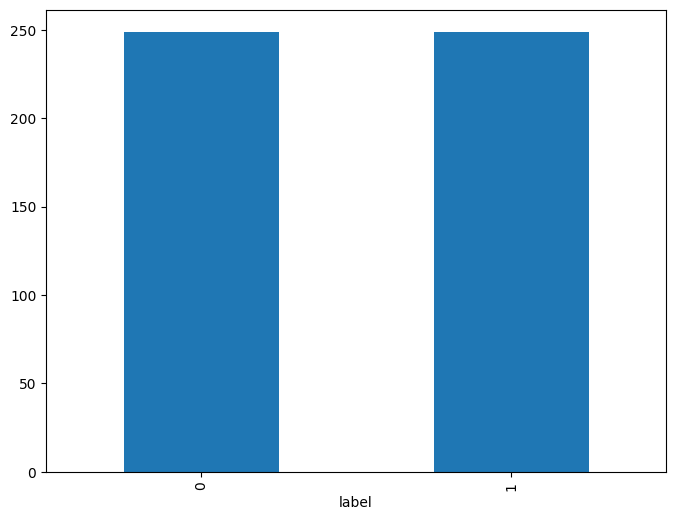

In [13]:
diabetes_df['label'].value_counts().plot(kind='bar', figsize=(8,6));



### Modeling with the balanced data

We will keep using a [**k-nearest neighbors classifier**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

Having diabetes observations balanced, let's use them to train our model and test if it improves.

#### Create features $X$ and labels $y$

In [14]:
X = diabetes_df.drop(['label'], axis=1)
y = diabetes_df['label']

#### Split the dataset

As we now have less data to process, we will use a smaller test set that will have only 10% of the observations.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=10)


#### Stantardize the features

Use the `StandardScaler` to standardize the features (`X_train` and `X_test`) before moving to model creation.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Build and fit a k-nearest neighbors classifier

Use `10` neighbors.

For training use `X_train` and `y_train`.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### Evaluating the model

Now use your model to get the predictions for the `X_test` set:

In [18]:
y_pred = model.predict(X_test)

Get the `score` of the model using the `X_test` and `y_test` data:

In [19]:
model.score(X_test, y_test)

0.76

Get the `Accuracy` of your prediction:

In [26]:
from sklearn.metrics import accuracy_score

accuracy = model.score(X_test, y_test)
accuracy

0.76



### Confusion matrix

Show a confusion matrix to understand the outputs of the model.

In [27]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  4],
       [ 8, 19]], dtype=int64)

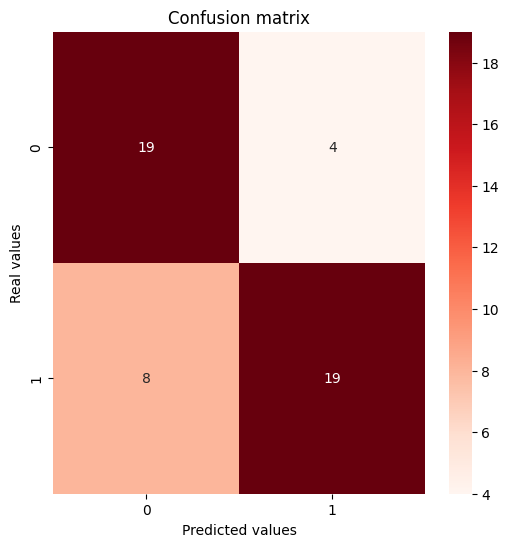

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt="d");
plt.title("Confusion matrix")
plt.ylabel('Real values')
plt.xlabel('Predicted values');

Separate the values above into `tp`, `fn`, `fp` and `tn`.

In [29]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print('tp:', tp,  'fn:',fn, 'fp:', fp, 'tn:', tn)

tp: 19 fn: 4 fp: 8 tn: 19


Go ahead and manually calculate the precision and recall for "No diabetes" value.

#### Precision

In [30]:
no_diabetes_precision = tp / (tp + fp)
no_diabetes_precision

0.7037037037037037

#### Recall

In [31]:
no_diabetes_recall = tp / (tp + fn)
no_diabetes_recall

0.8260869565217391

Finally, call the `classification_report` method and validate precision and recall values of your model.

In [32]:
from sklearn.metrics import classification_report

model_report = classification_report(y_test, y_pred)
print('Model report: \n', model_report)

Model report: 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.83      0.70      0.76        27

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.77      0.76      0.76        50



> Compare the results of this project with previous **Diabetes analysis project**.





- **Before resampling:**  The model achieved higher accuracy (0.74) and better precision for the majority class (non-diabetics), but struggled with recall for the minority class (diabetics, class 1), leading to poor detection of diabetic cases.



- **After resampling:**  The model's recall for diabetics improved significantly (from 0.44 to 0.70), making it more sensitive to the minority class. However, the overall accuracy slightly increased to 0.76. This resampling resulted in a more balanced performance between classes, with improved detection of diabetic cases, while maintaining a slightly higher overall accuracy.